Assignment_HW_02_EDA_IdrisMahamat

In [ ]:
# Install dependancies

# conda install matplotlib
# pip install pandas

In [15]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as se

In [16]:
# 1- now let's load the dataset  breast-cancer-wisconsin_pfizer05.csv

chemin_fichier = '/home/elcaskerito/Documents/Stevens Jupiter/breast-cancer-wisconsin_pfizer05.csv'
df = pd.read_csv(chemin_fichier)

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sample  35 non-null     int64  
 1   F1      35 non-null     int64  
 2   F2      35 non-null     int64  
 3   F3      35 non-null     int64  
 4   F4      35 non-null     int64  
 5   F5      35 non-null     int64  
 6   F6      34 non-null     float64
 7   F7      35 non-null     int64  
 8   F8      35 non-null     int64  
 9   F9      35 non-null     int64  
 10  Class   35 non-null     int64  
dtypes: float64(1), int64(10)
memory usage: 3.1 KB
None
    Sample  F1  F2  F3  F4  F5    F6  F7  F8  F9  Class
0  1198641  10  10   6   3   3  10.0   4   3   2      4
1  1080233   7   6   6   3   2  10.0   7   1   1      4
2   606140   1   1   1   1   2   NaN   2   1   1      2
3   740492   1   1   1   1   2   1.0   3   1   1      2
4  1120559   8   3   8   3   4   9.0   8   9   8      4


In [17]:
# I. Summarize each column by min,max,mean

detail = df.describe(include='all')
print(detail)

             Sample         F1         F2         F3         F4         F5  \
count  3.500000e+01  35.000000  35.000000  35.000000  35.000000  35.000000   
mean   1.063904e+06   5.485714   4.000000   4.142857   2.942857   3.771429   
std    2.728643e+05   3.211848   3.605551   3.573949   3.262468   2.755590   
min    1.280590e+05   1.000000   1.000000   1.000000   1.000000   1.000000   
25%    1.033582e+06   2.500000   1.000000   1.000000   1.000000   2.000000   
50%    1.137156e+06   5.000000   2.000000   3.000000   1.000000   2.000000   
75%    1.233062e+06   8.000000   7.000000   7.000000   3.000000   6.000000   
max    1.369821e+06  10.000000  10.000000  10.000000  10.000000  10.000000   

              F6         F7         F8         F9      Class  
count  34.000000  35.000000  35.000000  35.000000  35.000000  
mean    4.382353   3.942857   3.685714   2.714286   2.857143  
std     3.915894   2.300164   3.668398   2.936298   1.004193  
min     1.000000   1.000000   1.000000   1.00

In [18]:
# II. Identifying missing values

ms_val = df.isnull().sum()
print(ms_val)


Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        1
F7        0
F8        0
F9        0
Class     0
dtype: int64


In [19]:
# Replacing the missing values with the “mean” of the column.

df['F6'].fillna(df['F6'].mean(),inplace=True)

# let check the missing value again

print(df.isnull().sum())

Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64


/tmp/ipykernel_43690/660814534.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['F6'].fillna(df['F6'].mean(),inplace=True)


In [20]:
# Displaying the frequency table of “Class” vs. F6 using groupby

# freq_table = df.groupby("Class")["F6"].value_counts().unstack()

# print("Frequency Table:\n -------------- \n", freq_table,)

# print("-------------------------------------------------")

# Displaying the frequency table of “Class” vs. F6 using crosstab 
ts = pd.crosstab(df["F6"], df["Class"])
print(ts)

# print(df.info())



Class       2  4
F6              
1.000000   17  0
2.000000    1  0
3.000000    0  1
4.382353    1  0
5.000000    1  2
8.000000    0  3
9.000000    0  2
10.000000   0  7


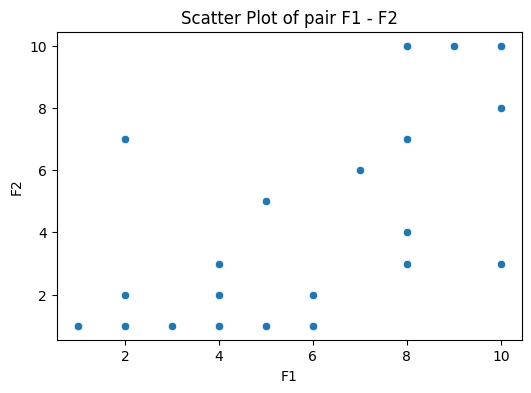

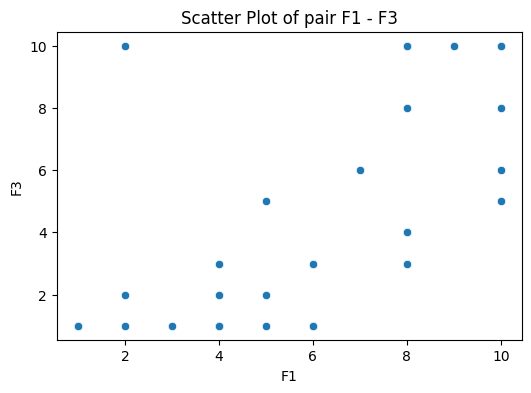

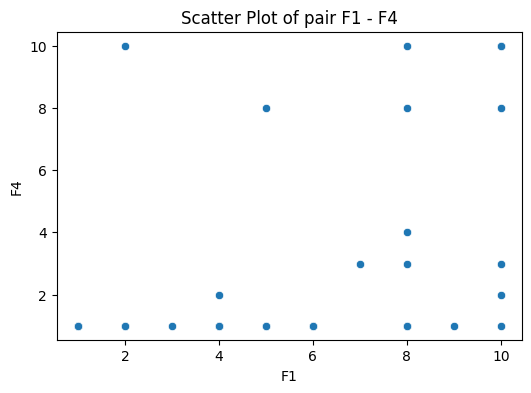

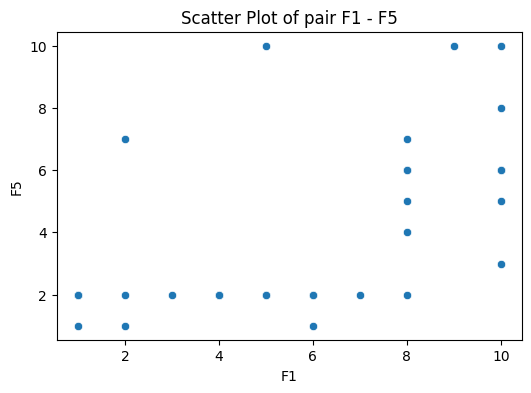

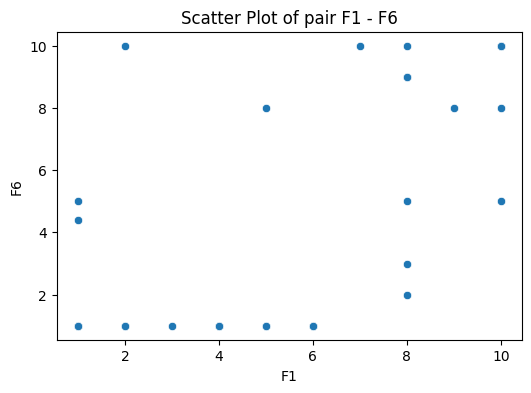

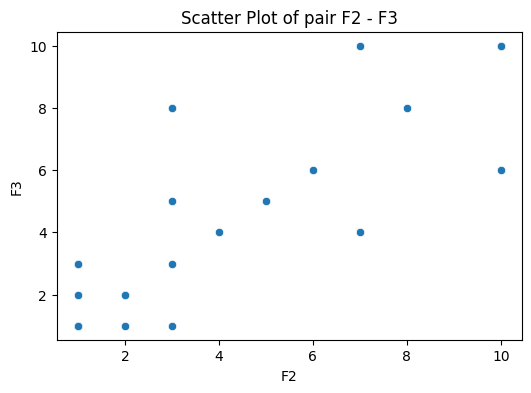

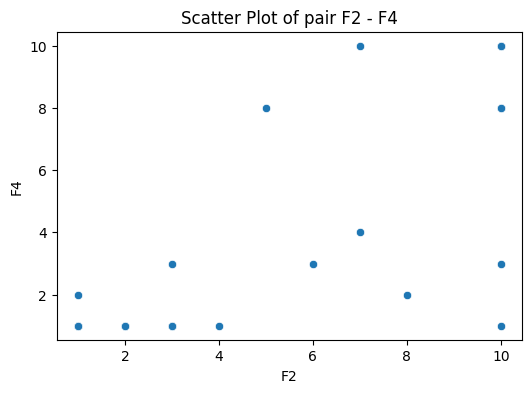

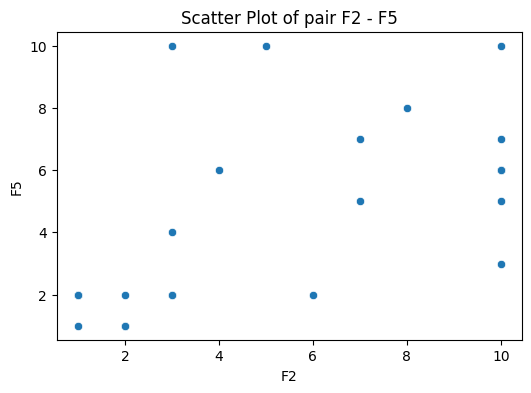

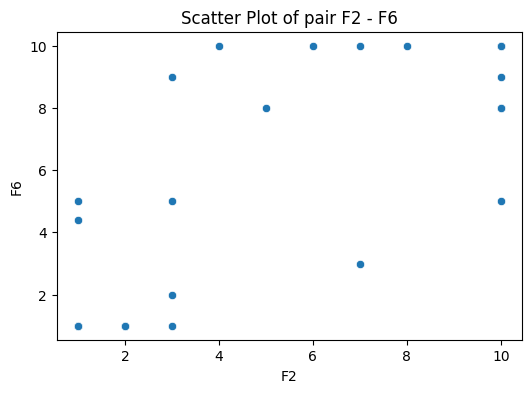

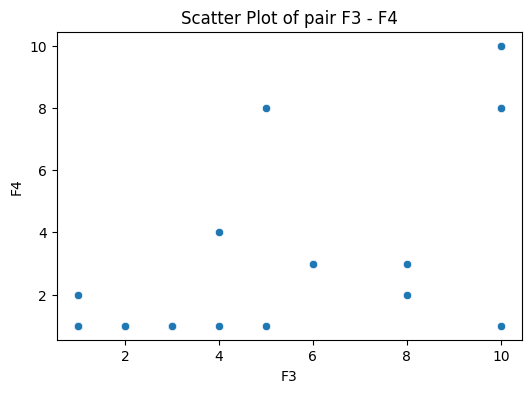

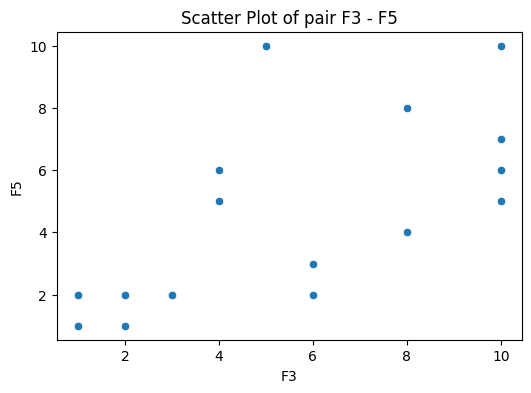

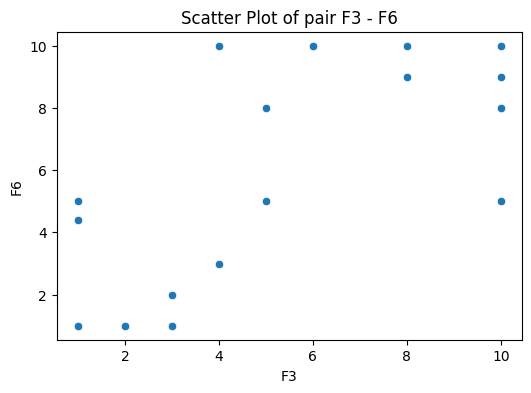

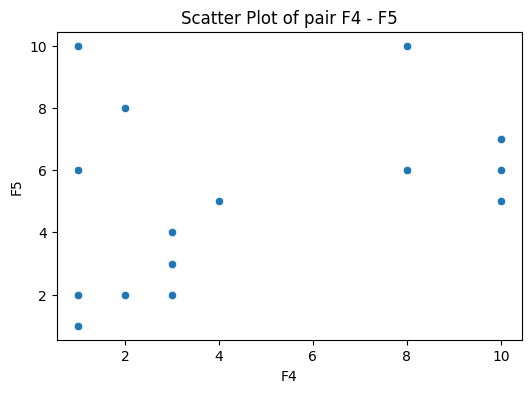

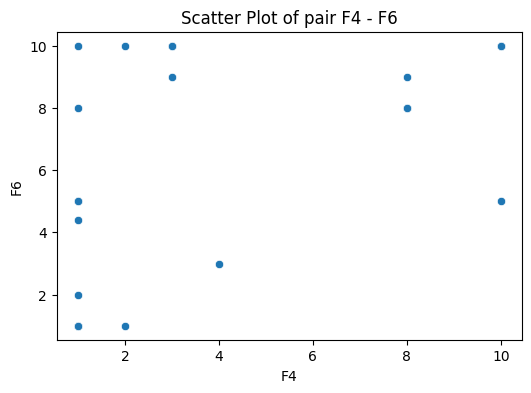

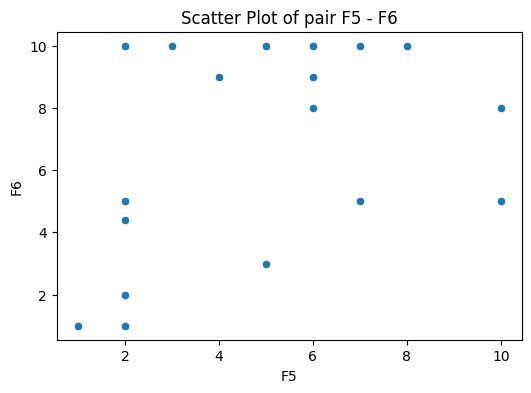

In [35]:
# v. Displaying the scatter plot of F1 to F6, one pair at a time

fn = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6']

for i in range(len(fn)):
    for j in range(i+1, len(fn)):
        pt.figure(figsize=(6,4))
        se.scatterplot(x=df[fn[i]], y=df[fn[j]])
        pt.xlabel(fn[i])
        pt.ylabel(fn[j])
        pt.title(f'Scatter Plot of pair {fn[i]} - {fn[j]}')
        pt.show()




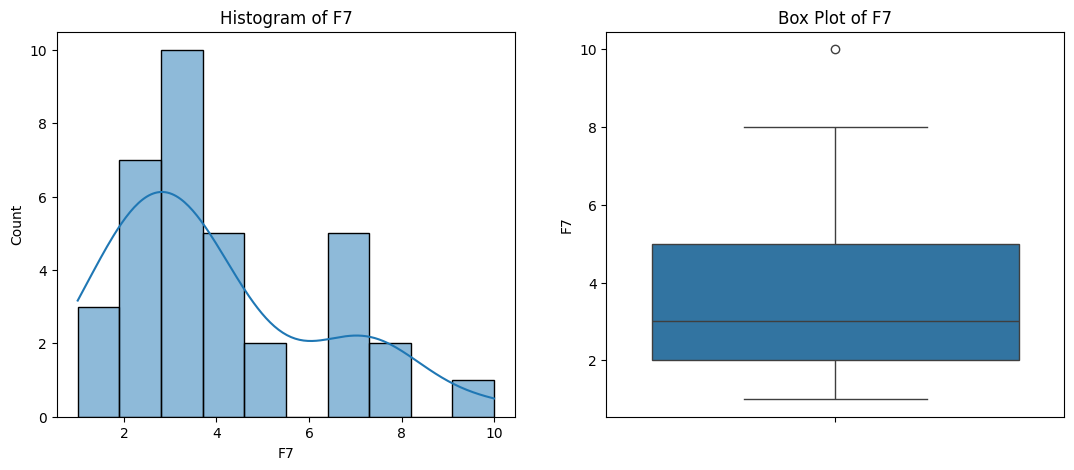

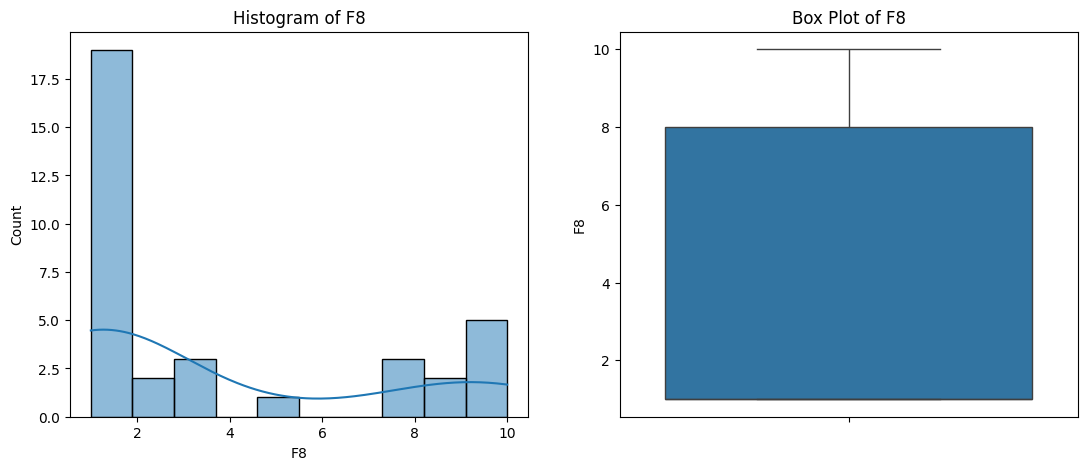

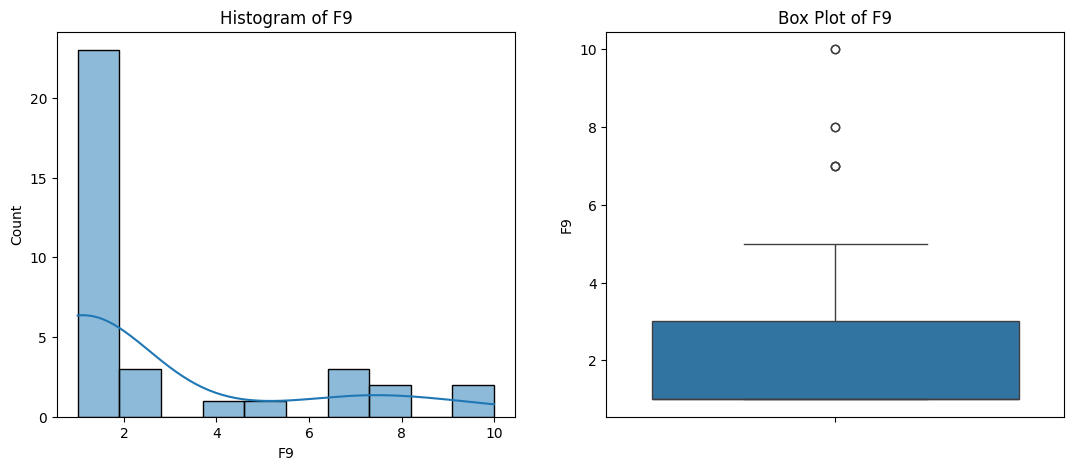

In [38]:
# VI. Show histogram box plot for columns F7 to F9

fn_f7F9 = ['F7', 'F8', 'F9']

for fn in fn_f7F9:
    pt.figure(figsize=(13, 5))

    # Histogram
    pt.subplot(1, 2, 1)
    se.histplot(df[fn], bins=10, kde=True)
    pt.title(f'Histogram of {fn}')

    # Box plot
    pt.subplot(1, 2, 2)
    se.boxplot(y=df[fn])
    pt.title(f'Box Plot of {fn}')

    pt.show()

In [39]:
#  2-Delete all the objects from your R/Python- environment. Reload the “breast-cancer-
# wisconsin.data.csv” from canvas into R/Python. Remove any row with a missing value in any of the
# columns. 


del df
# Reload the “breast-cancer-wisconsin_pfizer05.csv” into Python
df = pd.read_csv(chemin_fichier)

# Remove all row with a missing value in any columns
df_cleaned = df.dropna()

# Display the cleaned dataset info
print(df_cleaned.info())
print(df_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 0 to 34
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sample  34 non-null     int64  
 1   F1      34 non-null     int64  
 2   F2      34 non-null     int64  
 3   F3      34 non-null     int64  
 4   F4      34 non-null     int64  
 5   F5      34 non-null     int64  
 6   F6      34 non-null     float64
 7   F7      34 non-null     int64  
 8   F8      34 non-null     int64  
 9   F9      34 non-null     int64  
 10  Class   34 non-null     int64  
dtypes: float64(1), int64(10)
memory usage: 3.2 KB
None
    Sample  F1  F2  F3  F4  F5    F6  F7  F8  F9  Class
0  1198641  10  10   6   3   3  10.0   4   3   2      4
1  1080233   7   6   6   3   2  10.0   7   1   1      4
3   740492   1   1   1   1   2   1.0   3   1   1      2
4  1120559   8   3   8   3   4   9.0   8   9   8      4
5  1369821  10  10  10  10   5  10.0  10  10   7      4
